Open in Colab badge. Replace at end of the link with final file name on Github
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/dianakorka/dmml2021/blob/main/Assignment1_2021.ipynb)

# Data Mining and Machine Learning - Assignment 1

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression (up to and including week 4)

**Due: Sunday November 7, 23.59pm**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the sales of a store.

Run the first few cells to load the dataset and then get started with the questions! 

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit your Python notebook **ADD LINK**
2. Answer the questions to the quiz on Moodle **ADD LINK** (Note: You can only complete the quiz one time. Have your notebook ready for answering the quiz) 

The answers to the quiz should be supported by your code in the notebook. If they are not you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in slack (channel #assignment1_questions).


If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repo for updates.

Good luck!

In [3]:
# Import requiered packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [5]:
# Load the data
df=pd.read_csv('https://raw.githubusercontent.com/dianakorka/dmml2021/main/data/sales.csv?token=AC35JB4ZJ6JQ65HMHE2TKV3BEPMHM')

For the first part we use data from [Kaggle](https://www.kaggle.com/rohitsahoo/sales-forecasting) on the retail sales of a store over several years. The dataset includes information on items purchased from this store, including for each item or article:
* order ID (a unique identifyier of the order through which this item was purchased)
* date of the order
* date the shipment was made
* mode of shipment used (first class, second class, etc.)
* customer ID (unique identifyier of the client)
* customer name
* client segment (consumer, corporate, etc.)
* country, city, state, postal code, region of the client
* product ID, product category, sub-category, and product name
* sales value of the purchase for this item in USD.

## 1. Understand and Clean the Dataset

>1.1 Show the first 5 or 10 rows to get an idea of the data. What does each column show?

In [6]:
# YOUR CODE HERE
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62



### 1.2 Describe the dataset.

>1.2.1. How many observations(rows) and columns are in the dataset?

In [7]:
# YOUR CODE HERE
df.shape

(9800, 18)

> 1.2.2. For which variable(s), if any, are there missing/null values?

In [8]:
# YOUR CODE HERE
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

>1.2.3. How many countries, regions and cities are there included in the dataset?

In [9]:
# YOUR CODE HERE
df[['Country', 'Region']].value_counts()

Country        Region 
United States  West       3140
               East       2785
               Central    2277
               South      1598
dtype: int64

In [11]:
# YOUR CODE HERE
df['City'].nunique()

529

>1.2.4. Which state generated the highest demand by *number* of items ordered over the entire period?

In [12]:
# YOUR CODE HERE
df['State'].value_counts().head()

California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: State, dtype: int64

>... and by total (aggregated) sales over the entire period?

In [13]:
# YOUR CODE HERE
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head()

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Name: Sales, dtype: float64

>1.2.5. How many orders were placed in total over the entire period?

In [14]:
df['Order ID'].nunique()

4922

>...And what was the order with the biggest number of items included?

In [15]:
# YOUR CODE HERE
df.groupby('Order ID')['Row ID'].count().sort_values(ascending=False).head()

Order ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
US-2016-126977    10
Name: Row ID, dtype: int64

>1.2.6. What percentage of technology items (Hint: look at Category) were shipped first class (Hint: look at Ship Mode)?

In [16]:
# YOUR CODE HERE
df[(df['Category']=='Technology') & (df['Ship Mode']=='First Class')].shape[0]/df[df['Category']=='Technology'].shape[0]

0.16381687810259238

### 1.3. Data types and handling missing values

>1.3.1. List the different features and their data type. ¶


In [17]:
# YOUR CODE HERE
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

>1.3.2. Are there any duplicated entries?

In [18]:
df.duplicated().sum()

0

>1.3.3. Change the data type for the following columns: Order Date, Ship Date (from string to datetime), Ship Mode and Segment (from string to category). 

In [19]:
# YOUR CODE HERE
df['Order Date'].sample(3)

5371    08/04/2018
5572    05/12/2015
4860    18/12/2017
Name: Order Date, dtype: object

In [20]:
# YOUR CODE HERE
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Order Date'].head(2)

0   2017-11-08
1   2017-11-08
Name: Order Date, dtype: datetime64[ns]

In [21]:
# YOUR CODE HERE
df['Ship Date'].sample(3)

16      18/11/2015
9097    17/04/2015
207     07/12/2018
Name: Ship Date, dtype: object

In [22]:
# YOUR CODE HERE
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")

df["Ship Mode"] =  pd.Categorical(df["Ship Mode"], categories = ['Standard Class', 'Second Class', 'First Class', 'Same Day'], ordered=False)
df["Segment"] =  pd.Categorical(df["Segment"], categories = ['Consumer', 'Corporate', 'Home Office'], ordered=False)
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

>1.3.4. For which order period have these data samples been collected? (i.e, the oldest and the most recent order dates in the dataset)

In [23]:
# YOUR CODE HERE
df['Order Date'].describe(datetime_is_numeric=True)[['min', 'max']]

min    2015-01-03 00:00:00
max    2018-12-30 00:00:00
Name: Order Date, dtype: object

>1.3.5. For the postal code column, drop the missing values and set the data type to integer.


In [24]:
# YOUR CODE HERE
df.dropna(inplace=True, axis=0)
df['Postal Code']=df['Postal Code'].astype(int)
df['Postal Code'].head()

0    42420
1    42420
2    90036
3    33311
4    33311
Name: Postal Code, dtype: int64

>1.3.6. A few of the postal codes in our series only have 4 digits instead of 5. This is because the 0 in front of the 4 digit number was dropped when the code was read as a float. Fix this by adding a zero to the postal codes with 4 digits.

Hint: you will need to transform the postal code series into a string. Afterwards, the `zfill()` function may be useful.

In [25]:
# YOUR CODE HERE
np.sort(df['Postal Code'].unique())[0:70]

array([ 1040,  1453,  1752,  1810,  1841,  1852,  1915,  2038,  2138,
        2148,  2149,  2151,  2169,  2740,  2886,  2895,  2908,  2920,
        3060,  3301,  3820,  4240,  4401,  6010,  6040,  6360,  6450,
        6457,  6460,  6484,  6708,  6810,  6824,  7002,  7011,  7017,
        7036,  7050,  7055,  7060,  7090,  7109,  7501,  7601,  7960,
        8302,  8360,  8401,  8701,  8861,  8901, 10009, 10011, 10024,
       10035, 10550, 10701, 10801, 11520, 11550, 11561, 11572, 11757,
       12180, 13021, 13440, 13501, 13601, 14215, 14304])

In [26]:
# YOUR CODE HERE
df['Postal Code'] = df['Postal Code'].astype(str).str.zfill(5)

In [27]:
# CHECK IF IT WORKED
np.sort(df['Postal Code'].unique())[0:70]

array(['01040', '01453', '01752', '01810', '01841', '01852', '01915',
       '02038', '02138', '02148', '02149', '02151', '02169', '02740',
       '02886', '02895', '02908', '02920', '03060', '03301', '03820',
       '04240', '04401', '06010', '06040', '06360', '06450', '06457',
       '06460', '06484', '06708', '06810', '06824', '07002', '07011',
       '07017', '07036', '07050', '07055', '07060', '07090', '07109',
       '07501', '07601', '07960', '08302', '08360', '08401', '08701',
       '08861', '08901', '10009', '10011', '10024', '10035', '10550',
       '10701', '10801', '11520', '11550', '11561', '11572', '11757',
       '12180', '13021', '13440', '13501', '13601', '14215', '14304'],
      dtype=object)


## 2. Exploratory Data Analysis and Visualization

>2.1 What are the top 5 dates on which the highest *value* of sales was reached over the entire period?

In [28]:
# YOUR CODE HERE
df.groupby('Order Date')['Sales'].sum().sort_values(ascending=False).head(5)

Order Date
2015-03-18    28106.716
2017-10-02    18452.972
2018-10-22    15158.877
2018-03-23    14816.068
2015-09-08    14228.428
Name: Sales, dtype: float64

>2.2 How many unique customers did the shop have over this period?

In [29]:
# YOUR CODE HERE
df['Customer ID'].nunique()

793

>...Plot the top ten customers by total value of their orders.

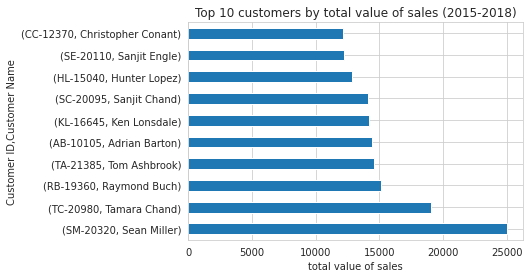

In [30]:
# YOUR CODE HERE
df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 customers by total value of sales (2015-2018)')
plt.xlabel('total value of sales');

>2.3. What are the most frequently bought product sub-categories ? 

Hint: look at sub-category and count the times they appear in the dataset.

In [31]:
# YOUR CODE HERE
df.groupby('Sub-Category')['Sales'].count().sort_values(ascending=False)

Sub-Category
Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sales, dtype: int64

>...What are the product sub-categories that generated most sales over the entire period?

Hint: aggregate sales by sub-category.

In [32]:
# YOUR CODE HERE
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

Sub-Category
Phones         326487.6980
Chairs         322107.5310
Storage        217779.1020
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    163881.6900
Copiers        146248.0940
Bookcases      109408.2987
Appliances     104075.4630
Furnishings     89212.0180
Paper           76736.1040
Supplies        46420.3080
Art             26697.3700
Envelopes       16126.0060
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

>...What was the average purchase price of a phone sold by the store?

In [33]:
# YOUR CODE HERE
a = df.groupby('Sub-Category')['Sales'].mean()
a.Phones

373.128797714286

>2.4 Create a new column storing the time difference between Ship Date and Order Date. What was the longest, shortest and average delivery time difference?

In [34]:
# YOUR CODE HERE
df['delivery'] = df['Ship Date'] - df['Order Date']
df.delivery.describe()

count                         9789
mean     3 days 23:04:06.031259577
std      1 days 18:00:39.083391657
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: delivery, dtype: object

>(BONUS QUESTION) 2.5. How many orders (not items) had a delivery time of 6 or more days?

In [35]:
# YOUR CODE HERE
df[df.delivery>=pd.Timedelta(days=6)].groupby('Order ID')['Order ID'].count().count()

887

>2.6. What are the average delivery times for each mode of shipment? Take the average over the total number of items ordered.

In [36]:
# YOUR CODE HERE
df.groupby('Ship Mode')['delivery'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
Standard Class,5849,5 days 00:14:16.761839630,1 days 00:15:21.615737915,3 days,4 days,5 days,6 days,7 days
Second Class,1901,3 days 05:59:48.637559179,1 days 04:30:57.722745286,1 days,2 days,3 days,4 days,5 days
First Class,1501,2 days 04:18:04.077281812,0 days 18:34:40.203296376,1 days,2 days,2 days,3 days,4 days
Same Day,538,0 days 01:04:14.275092936,0 days 04:57:33.470165756,0 days,0 days,0 days,0 days,1 days


In [37]:
# this is the average over the number of orders, very slightly different. To be omitted from the final solution.
df.pivot_table(index='Order ID',columns=['Ship Mode'],values='delivery',aggfunc='min').describe()

Ship Mode,Standard Class,Second Class,First Class,Same Day
count,2940,943,772,261
mean,5 days 00:03:55.102040816,3 days 05:43:35.058324496,2 days 04:26:44.145077720,0 days 01:06:12.413793103
std,1 days 00:10:00.248926030,1 days 04:09:53.707358504,0 days 18:20:44.943102291,0 days 05:02:09.971082682
min,3 days 00:00:00,1 days 00:00:00,1 days 00:00:00,0 days 00:00:00
25%,4 days 00:00:00,2 days 00:00:00,2 days 00:00:00,0 days 00:00:00
50%,5 days 00:00:00,3 days 00:00:00,2 days 00:00:00,0 days 00:00:00
75%,6 days 00:00:00,4 days 00:00:00,3 days 00:00:00,0 days 00:00:00
max,7 days 00:00:00,5 days 00:00:00,4 days 00:00:00,1 days 00:00:00


>2.7. Create a new column containing the year each order was placed (using Order Date). Plot the number of unique customers per year in a horizontal bar chart.

In [38]:
# YOUR CODE HERE
df['year']=pd.DatetimeIndex(df['Order Date']).year
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,delivery,year
6437,6438,US-2018-116897,2018-05-27,2018-05-29,First Class,JG-15160,James Galang,Consumer,United States,Pocatello,Idaho,83201,West,TEC-PH-10004389,Technology,Phones,Nokia Lumia 925,302.376,2 days,2018


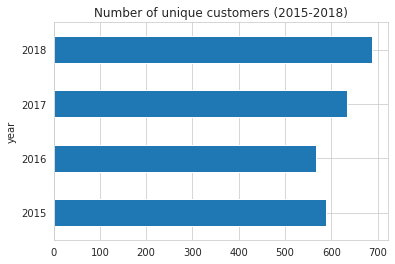

In [39]:
# YOUR CODE HERE
df.groupby('year')['Customer ID'].nunique().plot(kind='barh', title='Number of unique customers (2015-2018)');

>[BONUS QUESTION] 2.8. Churn in 2018 as compared to 2017. Were there any customers in 2017 that were lost in 2018? If so, how many?

In [40]:
# YOUR CODE HERE
# SAMPLE SOLUTION BELOW
# save list of unique customers in 2018
my2018list=df.loc[df['year']==2018, 'Customer ID'].unique().tolist()

# calculate number of unique customers in 2017
df.loc[df['year']==2017, 'Customer ID'].nunique()

635

In [41]:
# generate loop for counting the number of 2017 customers not among 2018 customers
lost_2018=[]
for i in range(0, 634):
    if df.loc[df['year']==2017, 'Customer ID'].unique()[i] not in my2018list:
          lost_2018.append(df.loc[df['year']==2017, 'Customer ID'].unique()[i])

In [42]:
len(lost_2018)

84

>2.9. Calculate the average sales by customer segment and by year (take the simple average over the number of items sold). Plot in a line chart the average sales per item, with the years on x-axis, the average sales on the y-axis, and a line for each segment.

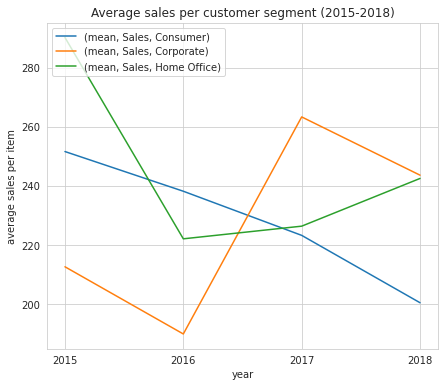

In [43]:
# YOUR CODE HERE
pivot1=df.pivot_table(index='year', columns='Segment', values=['Sales'], aggfunc=['mean'])
axes=pivot1.plot(figsize=(7,6), xticks=[2015, 2016, 2017, 2018], title='Average sales per customer segment (2015-2018)', ylabel='average sales per item')
axes.legend(loc=2);

>2.11. Using `folium`, plot on a map the location of a subset of customers defined below, using circle markers proportionate to the value of their aggregate purchases.

> Please only consider 2018 data for corporate customers with per item purchases above USD 100. Aggregate sales per Postal ZIP code for this subset of customers and plot the data showing the customer name as a popup.

>A separate database with latitude and longitude measures for US zip codes is provided below.

In [44]:
# import required packages
import folium

In [45]:
# import latitude and longitude data
latlong=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data', 
                    dtype={'ZIP': 'str'})
latlong.head()

,ZIP,LAT,LNG
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135


In [47]:
# YOUR CODE HERE
subset=df[(df['year']==2018)&(df['Segment']=='Corporate')&(df.Sales>100)]
subset.shape

(369, 20)

In [48]:
merged=pd.merge(subset,latlong, left_on='Postal Code',right_on='ZIP', how='left')
merged.shape

(369, 23)

In [49]:
merged.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,delivery,year,ZIP,LAT,LNG
0,42,CA-2018-120999,2018-09-10,2018-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,5 days,2018,60540,41.764670,-88.145428
1,144,CA-2018-106180,2018-09-18,2018-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700,5 days,2018,94122,37.758797,-122.485128


In [50]:
aggregated=merged.groupby(['Postal Code', 'LAT', 'LNG', 'Customer ID', 'Customer Name']).Sales.sum().reset_index()
aggregated.head(2)

,Postal Code,LAT,LNG,Customer ID,Customer Name,Sales
0,01841,42.712015,-71.164873,BP-11095,Bart Pistole,829.83
1,01841,42.712015,-71.164873,JB-15400,Jennifer Braxton,387.99


In [51]:
# Create an empty map
m = folium.Map(location=[40.5, -110.6], tiles="Stamen Toner", zoom_start=4)
 
# Add marker one by one on the map
for i in range(0,len(aggregated)):
   folium.Circle(
      location=[aggregated.iloc[i]['LAT'], aggregated.iloc[i]['LNG']],
      popup=aggregated.iloc[i]['Customer Name'],
      radius=float(aggregated.iloc[i]['Sales'])*100,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map
m

## 3. Regression Analysis

For this section please work on data aggregated by daily sales in USD. Here we are providing the dataframe for you. The regression dataset contains observations on aggregated sales by day, including:
* the date of the orders
* the number of orders receved on that day
* the number of items ordered on that day
* the number of customer segments represented in the orders for that day
* the number of product sub categories included
* the aggregated value of sales in USD
* the year, the month, and the day of the transactions stored separately.

In [109]:
# This is how the data was obtained. We can save it and re-read it in.
new_data = df.pivot_table(index='Order Date',values=['Order ID', 'Sales', 'Row ID', 'Segment', 'Sub-Category'],aggfunc=['nunique', 'sum'])

new_data.columns=('number_orders', 'number_items', 'n_s', 'number_segments', 'number_subcategory', 'rowID', 'sales_per_day')

new_data.drop(['n_s', 'rowID'], axis=1, inplace=True)

new_data.reset_index(inplace=True)

new_data['year'] = pd.DatetimeIndex(new_data['Order Date']).year
new_data.year=new_data.year.astype('int')

new_data['month'] = pd.DatetimeIndex(new_data['Order Date']).month
new_data.month=new_data.month.astype('int')

new_data['day'] = pd.DatetimeIndex(new_data['Order Date']).day
new_data.day=new_data.day.astype('int')

new_data.head()


,Order Date,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day
0,2015-01-03,1,1,1,1,16.448,2015,1,3
1,2015-01-04,1,3,1,3,288.060,2015,1,4
2,2015-01-05,1,1,1,1,19.536,2015,1,5
3,2015-01-06,3,9,3,6,4407.100,2015,1,6
4,2015-01-07,1,2,1,2,87.158,2015,1,7


In [96]:
# Tryied with standard scaler below, not really better results
from sklearn. preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#num_cols=['number_orders', 'number_items', 'number_segments', 'number_subcategory', 'sales_per_day']
#scaler=StandardScaler()
#preprocessor = ColumnTransformer([('standardization', scaler, num_cols)], remainder='passthrough')
#new_data_s=preprocessor.fit_transform(new_data)
#new_data_s=pd.DataFrame(new_data_s, columns=['number_orders', 'number_items', 'number_segments', 'number_subcategory', 'sales_per_day', 'order_date', 'year', 'month', 'day'])

In [ ]:
#new_data.to_csv('regression_sales.csv')

>3.1.1. Generate descriptive statistics

In [110]:
new_data.describe()

,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,4.000000,7.965012,2.004068,5.266884,1832.878285,2016.536208,6.787632,15.794142
std,2.799197,6.152745,0.770475,3.016305,2283.923773,1.124801,3.410032,8.781964
min,1.000000,1.000000,1.000000,1.000000,2.025000,2015.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,3.000000,377.736000,2016.000000,4.000000,8.000000
50%,3.000000,6.000000,2.000000,5.000000,1053.614000,2017.000000,7.000000,16.000000
75%,5.000000,11.000000,3.000000,7.000000,2379.994000,2018.000000,10.000000,23.000000
max,19.000000,38.000000,3.000000,14.000000,28106.716000,2018.000000,12.000000,31.000000


>3.1.2. Plot the distribution of sales per day, using bins=50. Then create a new column equal to the natural logarithm of sales per day and plot its histogram.

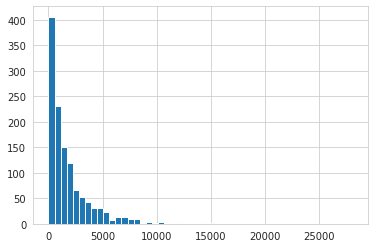

In [111]:
new_data.sales_per_day.hist(bins=50)

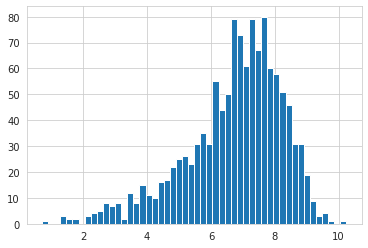

In [113]:
new_data['log_sales']=np.log(new_data['sales_per_day'])
new_data.log_sales.hist(bins=50)

>3.1.3. Create a pairplot with the log of sales per day on the horizontal axis and the number of items ordered and number of orders on the vertical axis.

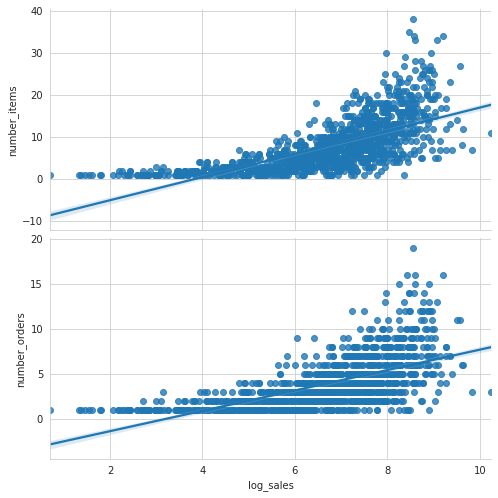

In [115]:
sns.pairplot(new_data, y_vars=['number_items', 'number_orders'],
             x_vars='log_sales', kind='reg', height=3.5, aspect=2)

>3.2 Regress log of sales on number of orders, number of items, number of segments, year, month and day.

>3.2.1. Select the dependent (y) and the independednt variables (X).

In [116]:
y = new_data["log_sales"]
X = new_data[['number_orders', 'number_items', 'number_segments', 'year', 'month', 'day']]

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 77.**

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data? (answer rounded to 2 decimal floating point)

In [119]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([-8.50696759e-02,  1.69065368e-01,  4.93390631e-01,  2.61469395e-03,
       -5.27419820e-03, -1.70831087e-04])

In [120]:
reg.score(X_test, y_test)

0.5112023472494771

>3.2.4. Predict what would be the total number of sales in USD on 15 January 2019 assuming 3 orders received on that day, 9 items, 3 segments

In [121]:
X_new=pd.DataFrame({'number_orders': 3, 'number_items': 9, 'number_segments': 3, 'year': 2019, 'month': 1, 'date': 15}, index=[0])

In [122]:
y_pred = reg.predict(X_new)
print(np.exp(y_pred))

[1814.43162377]
